In [1]:
import torch
from IPython import display
import d2l

#### 3.6.1 读取数据

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

#### 3.6.2 初始化模型参数

In [3]:
num_inputs = 784
num_outputs = 10
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [4]:
W, b

(tensor([[-1.7703e-04,  5.9173e-03,  1.6479e-04,  ..., -1.5737e-02,
           2.5712e-03,  8.4040e-03],
         [ 3.0242e-03, -5.5464e-04,  3.9241e-03,  ..., -7.5918e-03,
          -1.7359e-02, -7.4247e-05],
         [-1.7422e-03, -3.5250e-05, -9.9185e-03,  ...,  9.9154e-03,
          -2.3686e-03, -4.7761e-03],
         ...,
         [ 1.0700e-02,  7.9121e-03,  2.8058e-03,  ..., -8.7942e-03,
           3.9056e-03, -3.8888e-03],
         [-3.9759e-03,  1.6643e-04,  1.5945e-02,  ..., -1.0723e-03,
           8.6759e-04, -1.5134e-02],
         [-2.1117e-02, -8.6399e-03,  9.7505e-03,  ..., -1.0255e-02,
           1.1805e-02,  1.0955e-02]], requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))

#### 3.6.3 定义softmax运算 

In [5]:
def softmax(X):
    X = torch.exp(X)
    return X / X.sum(dim=1, keepdim=True)

In [6]:
A = torch.tensor([[2, 5, 3], [3, 6, 1]], dtype=torch.float32)

In [7]:
A, A.shape

(tensor([[2., 5., 3.],
         [3., 6., 1.]]),
 torch.Size([2, 3]))

In [8]:
softmax(A)

tensor([[0.0420, 0.8438, 0.1142],
        [0.0471, 0.9465, 0.0064]])

In [9]:
_.sum(dim=1)

tensor([1., 1.])

#### 3.6.4 定义softmax回归模型

In [10]:
def net(X):
    X = torch.matmul(X.reshape(-1, W.shape[0]), W) + b
    return softmax(X)

#### 3.6.5 定义损失函数

In [11]:
def cross_entropy(y_hat, y):
    """
    交叉熵损失
    """
    return -torch.log(y_hat[range(len(y_hat)), y]) 

In [12]:
y = torch.tensor([2, 0, 1])  # 三个样本的类别
y_hat = torch.tensor([[0.01, 0.15, 0.84], [0.11, 0.05, 0.84], [0.21, 0.13, 0.76]])
cross_entropy(y_hat, y)

tensor([0.1744, 2.2073, 2.0402])

#### 3.3.6 训练模型

In [13]:
lr = 0.1
def updater(batch_size):
    """
    梯度下降优化器
    """
    return d2l.sgd([W, b], lr, batch_size)

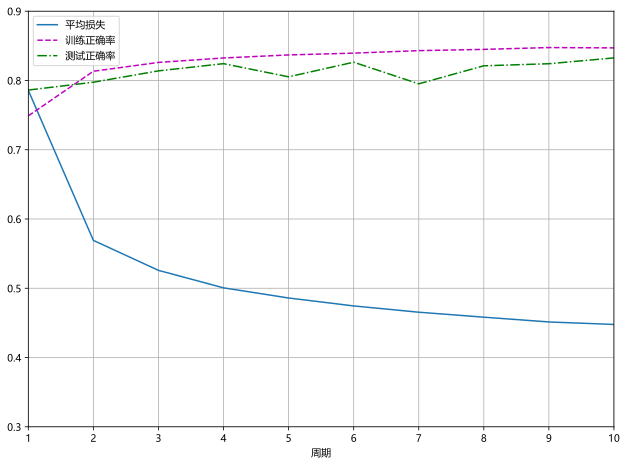

In [14]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

#### 3.3.7 预测

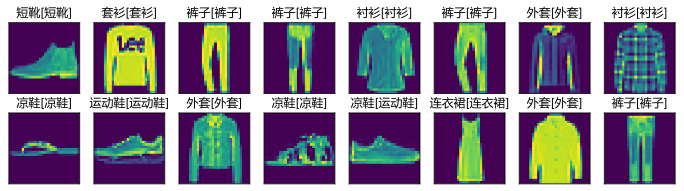

In [15]:
d2l.predict_ch3(net, test_iter, 16)